In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score

# DATA COLLECTION

In [2]:
df=pd.read_csv("C:\\Users\\abhin\\Downloads\\adult.csv",header=None)
df.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# DATA CLEANING

In [4]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
#no missing values

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
#no null values

In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(inplace=True) # there were 24 duplicate records were there so, deleted those using this command

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [13]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
## segregate numerical and categorical columns
numerical_columns=df.columns[df.dtypes != 'object']
categorical_columns=df.columns[df.dtypes == 'object']
print("Numerical_columns:",numerical_columns)
print("Categorical_columns:",categorical_columns)

Numerical_columns: Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')
Categorical_columns: Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [15]:
df[categorical_columns].describe()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [16]:
df['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [17]:
df['workclass'].isnull().sum()

0

In [31]:
df['workclass'].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            32551, 32552, 32553, 32554, 32555, 32556, 32557, 32558, 32559,
            32560],
           dtype='int64', length=32537)

In [18]:
df['education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

In [19]:
df['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [20]:
df['occupation'].replace('?','others')

0              Adm-clerical
1           Exec-managerial
2         Handlers-cleaners
3         Handlers-cleaners
4            Prof-specialty
                ...        
32556          Tech-support
32557     Machine-op-inspct
32558          Adm-clerical
32559          Adm-clerical
32560       Exec-managerial
Name: occupation, Length: 32537, dtype: object

In [21]:
df['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [22]:
df['relationship'].value_counts()

 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [23]:
df['race'].value_counts()

 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [24]:
df['sex'].value_counts()

 Male      21775
 Female    10762
Name: sex, dtype: int64

In [25]:
df['native_country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

# DATA VISUALIZATION

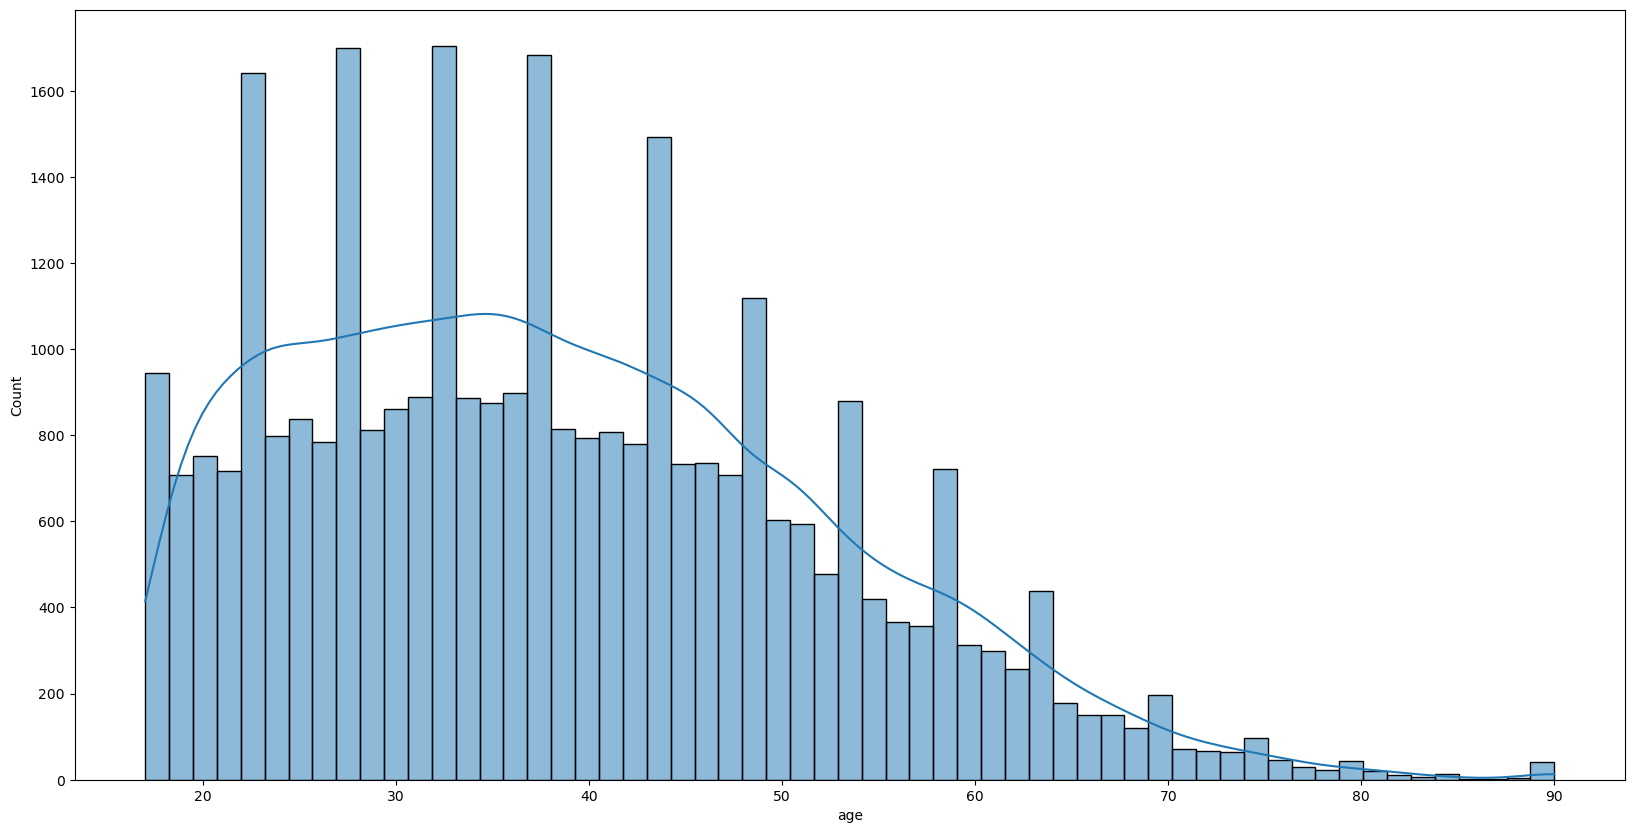

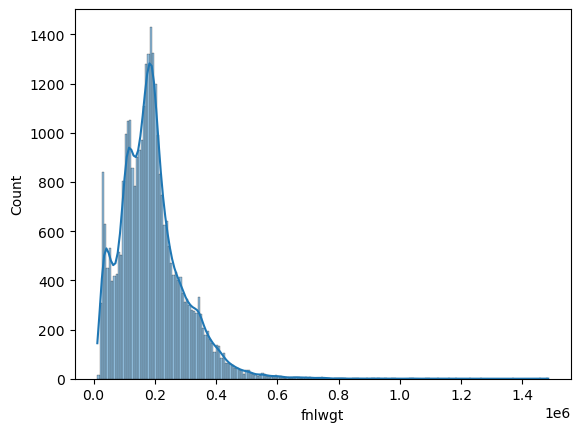

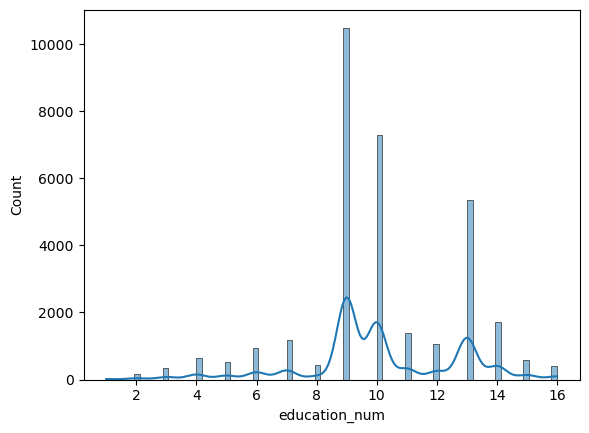

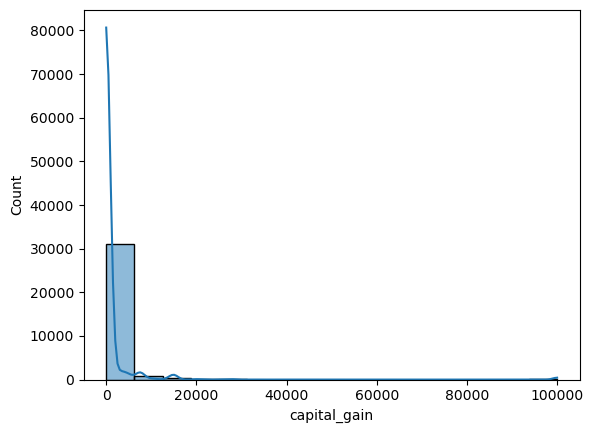

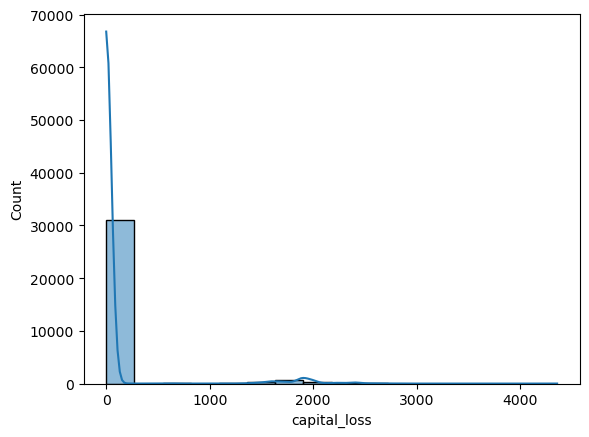

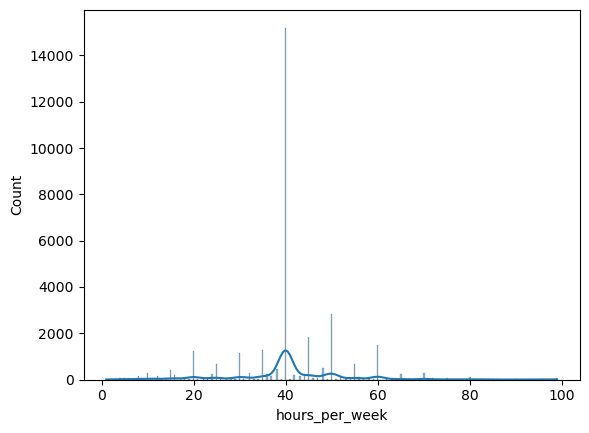

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<AxesSubplot:xlabel='workclass', ylabel='count'>

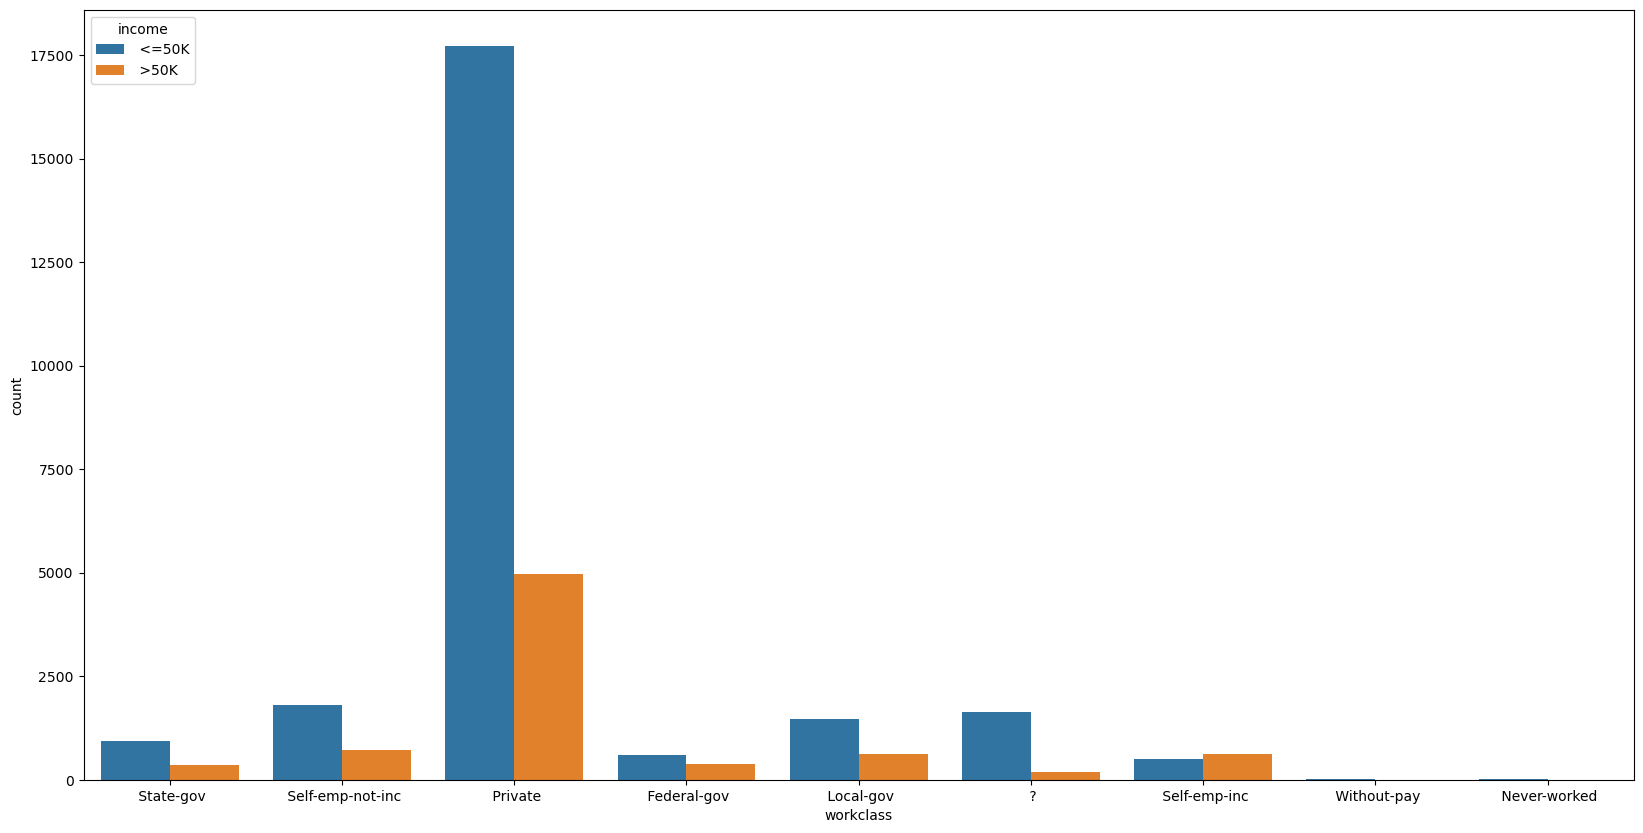

In [40]:
# for categorical columns we use countplot
#'workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'sex', 'native_country', 'income']
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="workclass",hue="income")


### Observation- We can observe that Private employees are more in number and that to those who earn more than 50k .

<AxesSubplot:xlabel='education', ylabel='count'>

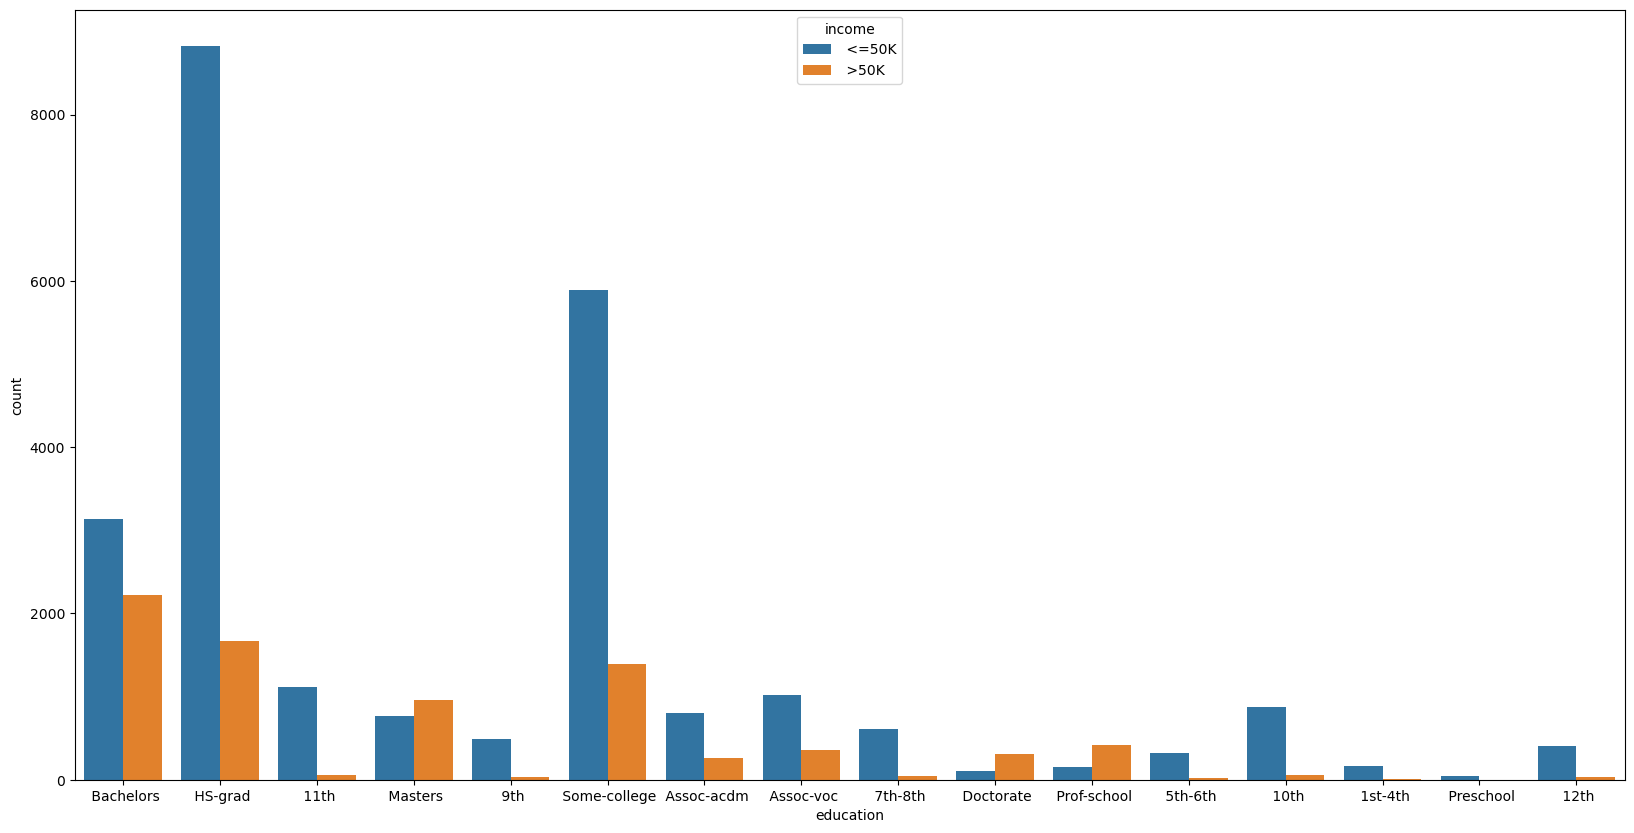

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="education",hue="income")


### Observation-  we can observe that number of persons studying in highschool grad is highest whose income is more than 50k

<AxesSubplot:xlabel='occupation', ylabel='count'>

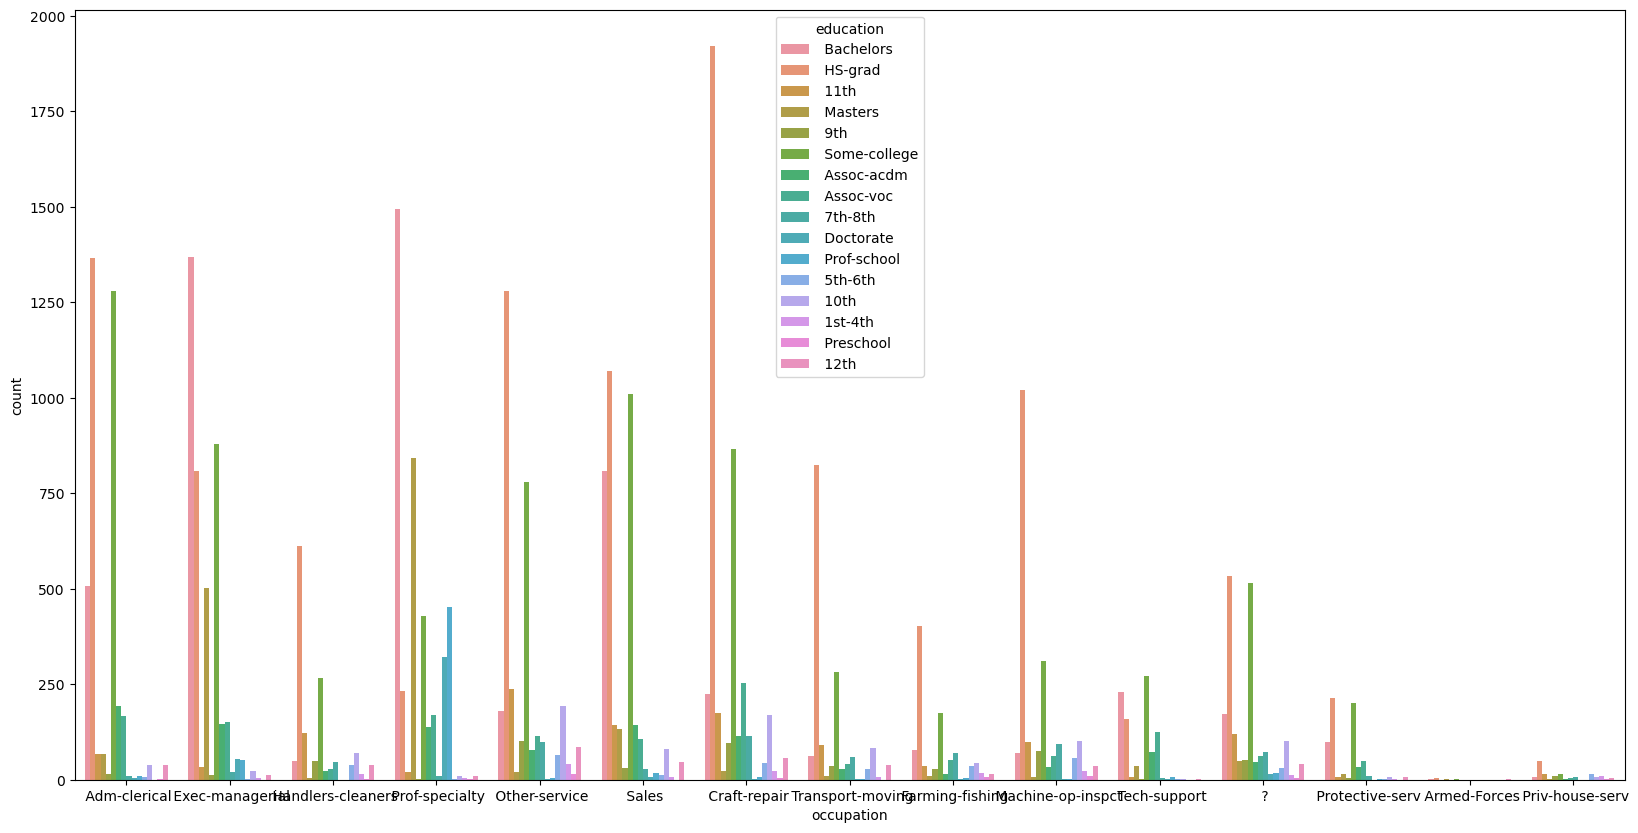

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="occupation",hue="income")

<AxesSubplot:xlabel='marital_status', ylabel='count'>

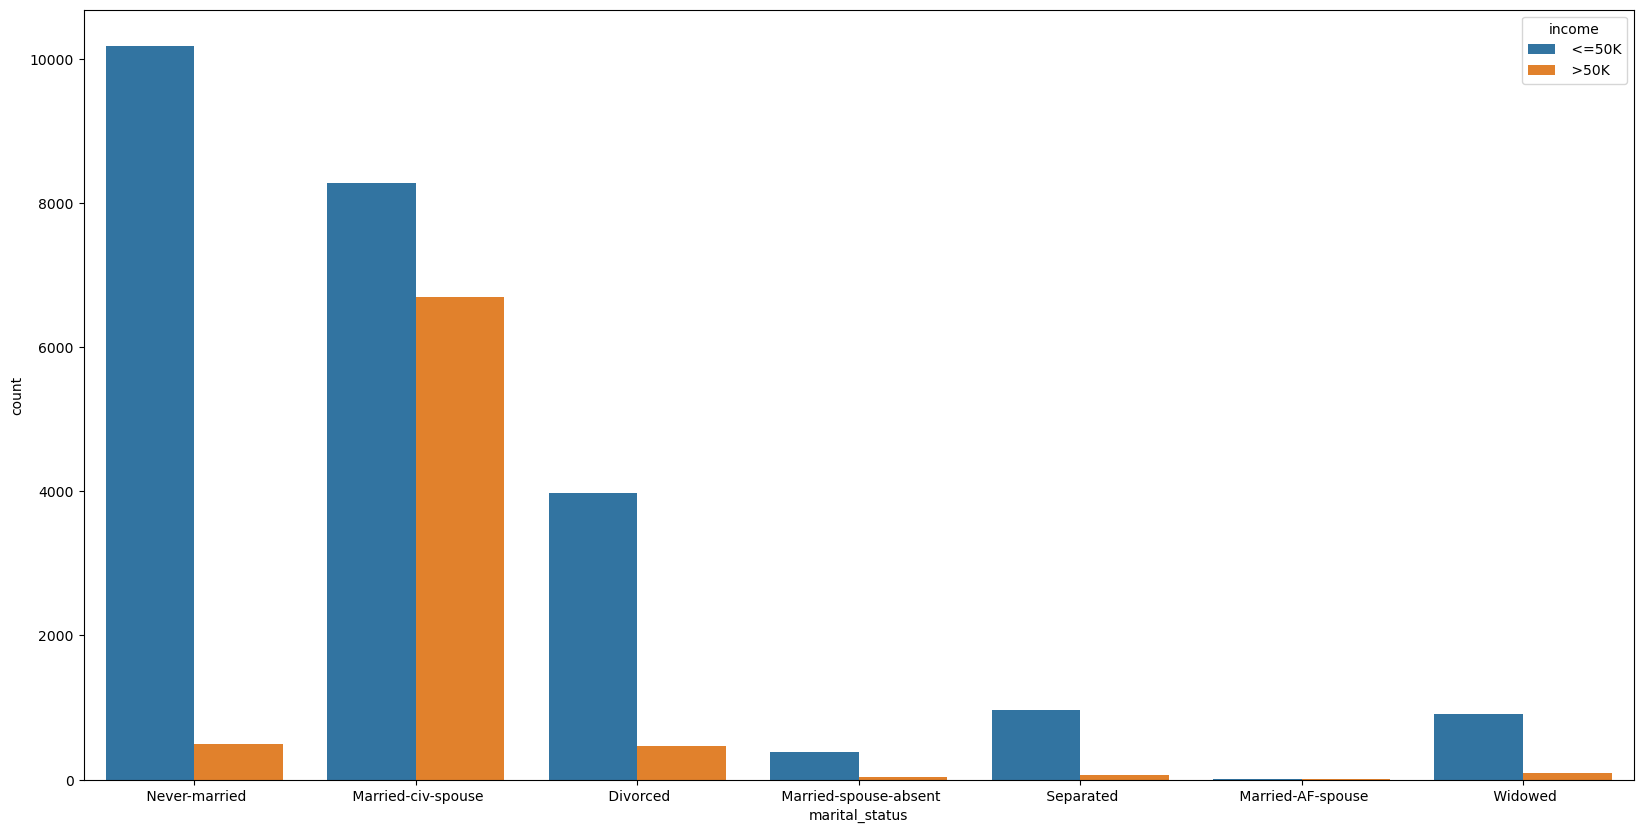

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="marital_status",hue="income")

### Observation-  we can observe that number of person, who are single are the highest whose income is more than 50k

<AxesSubplot:xlabel='relationship', ylabel='count'>

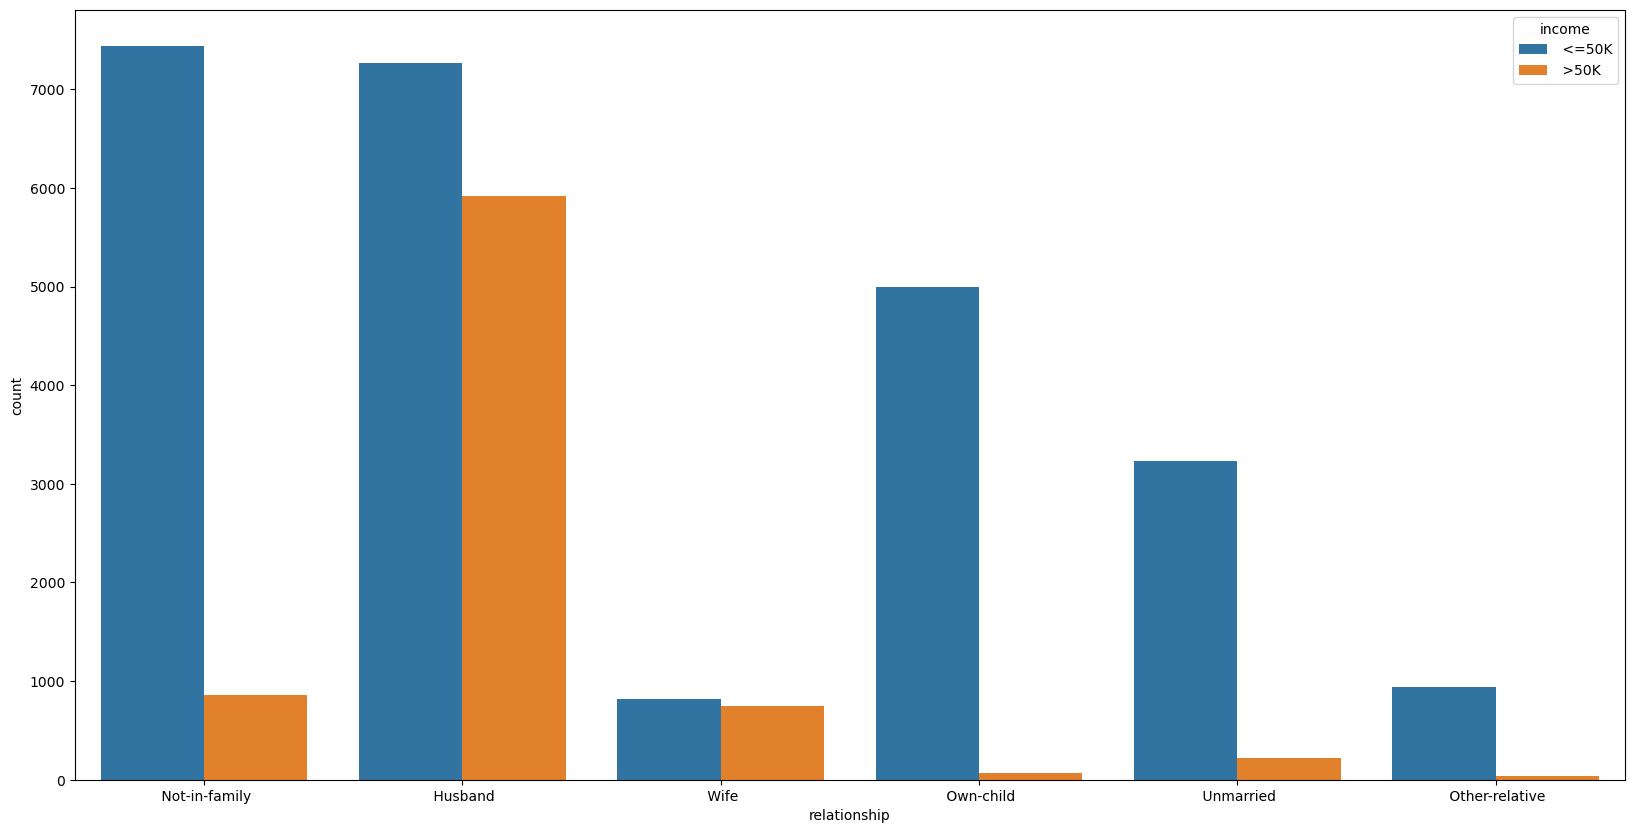

In [43]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="relationship",hue="income")

<AxesSubplot:xlabel='race', ylabel='count'>

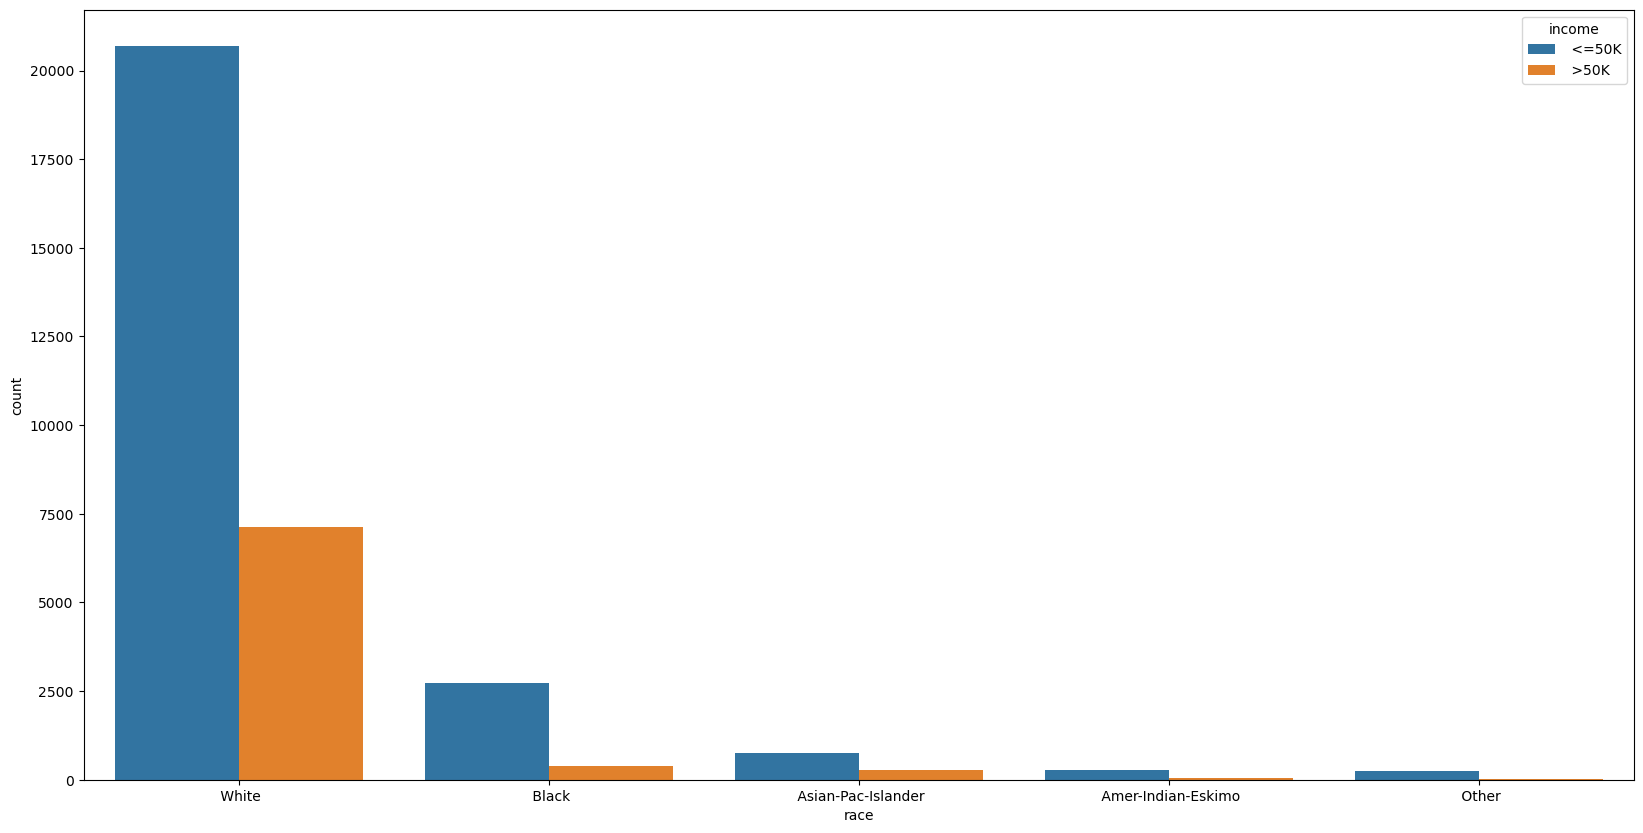

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="race",hue="income")

<AxesSubplot:xlabel='sex', ylabel='count'>

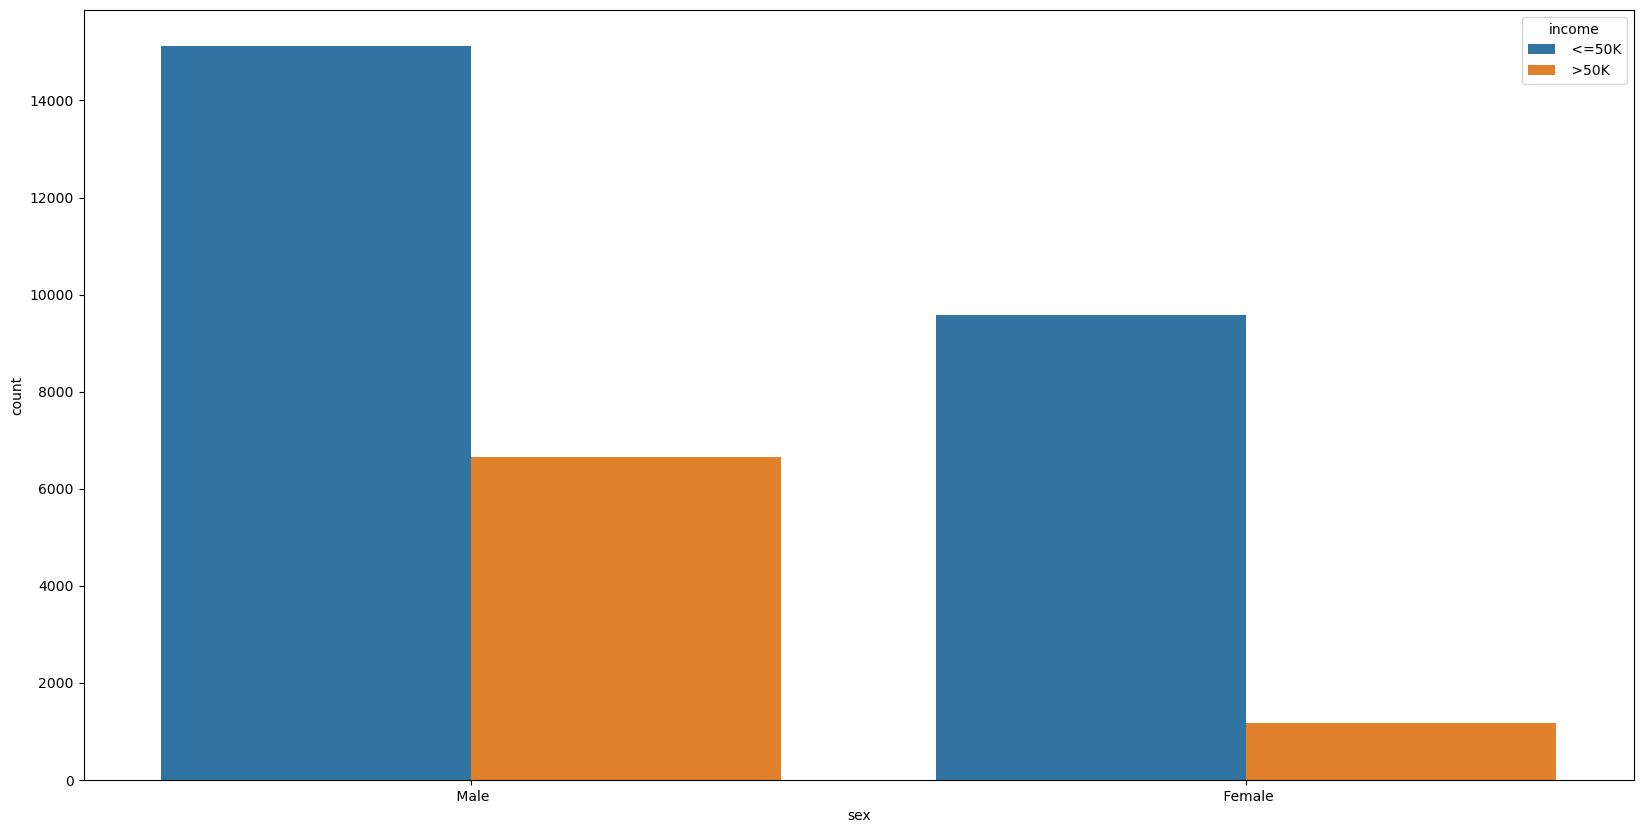

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="sex",hue="income")

<AxesSubplot:xlabel='native_country', ylabel='count'>

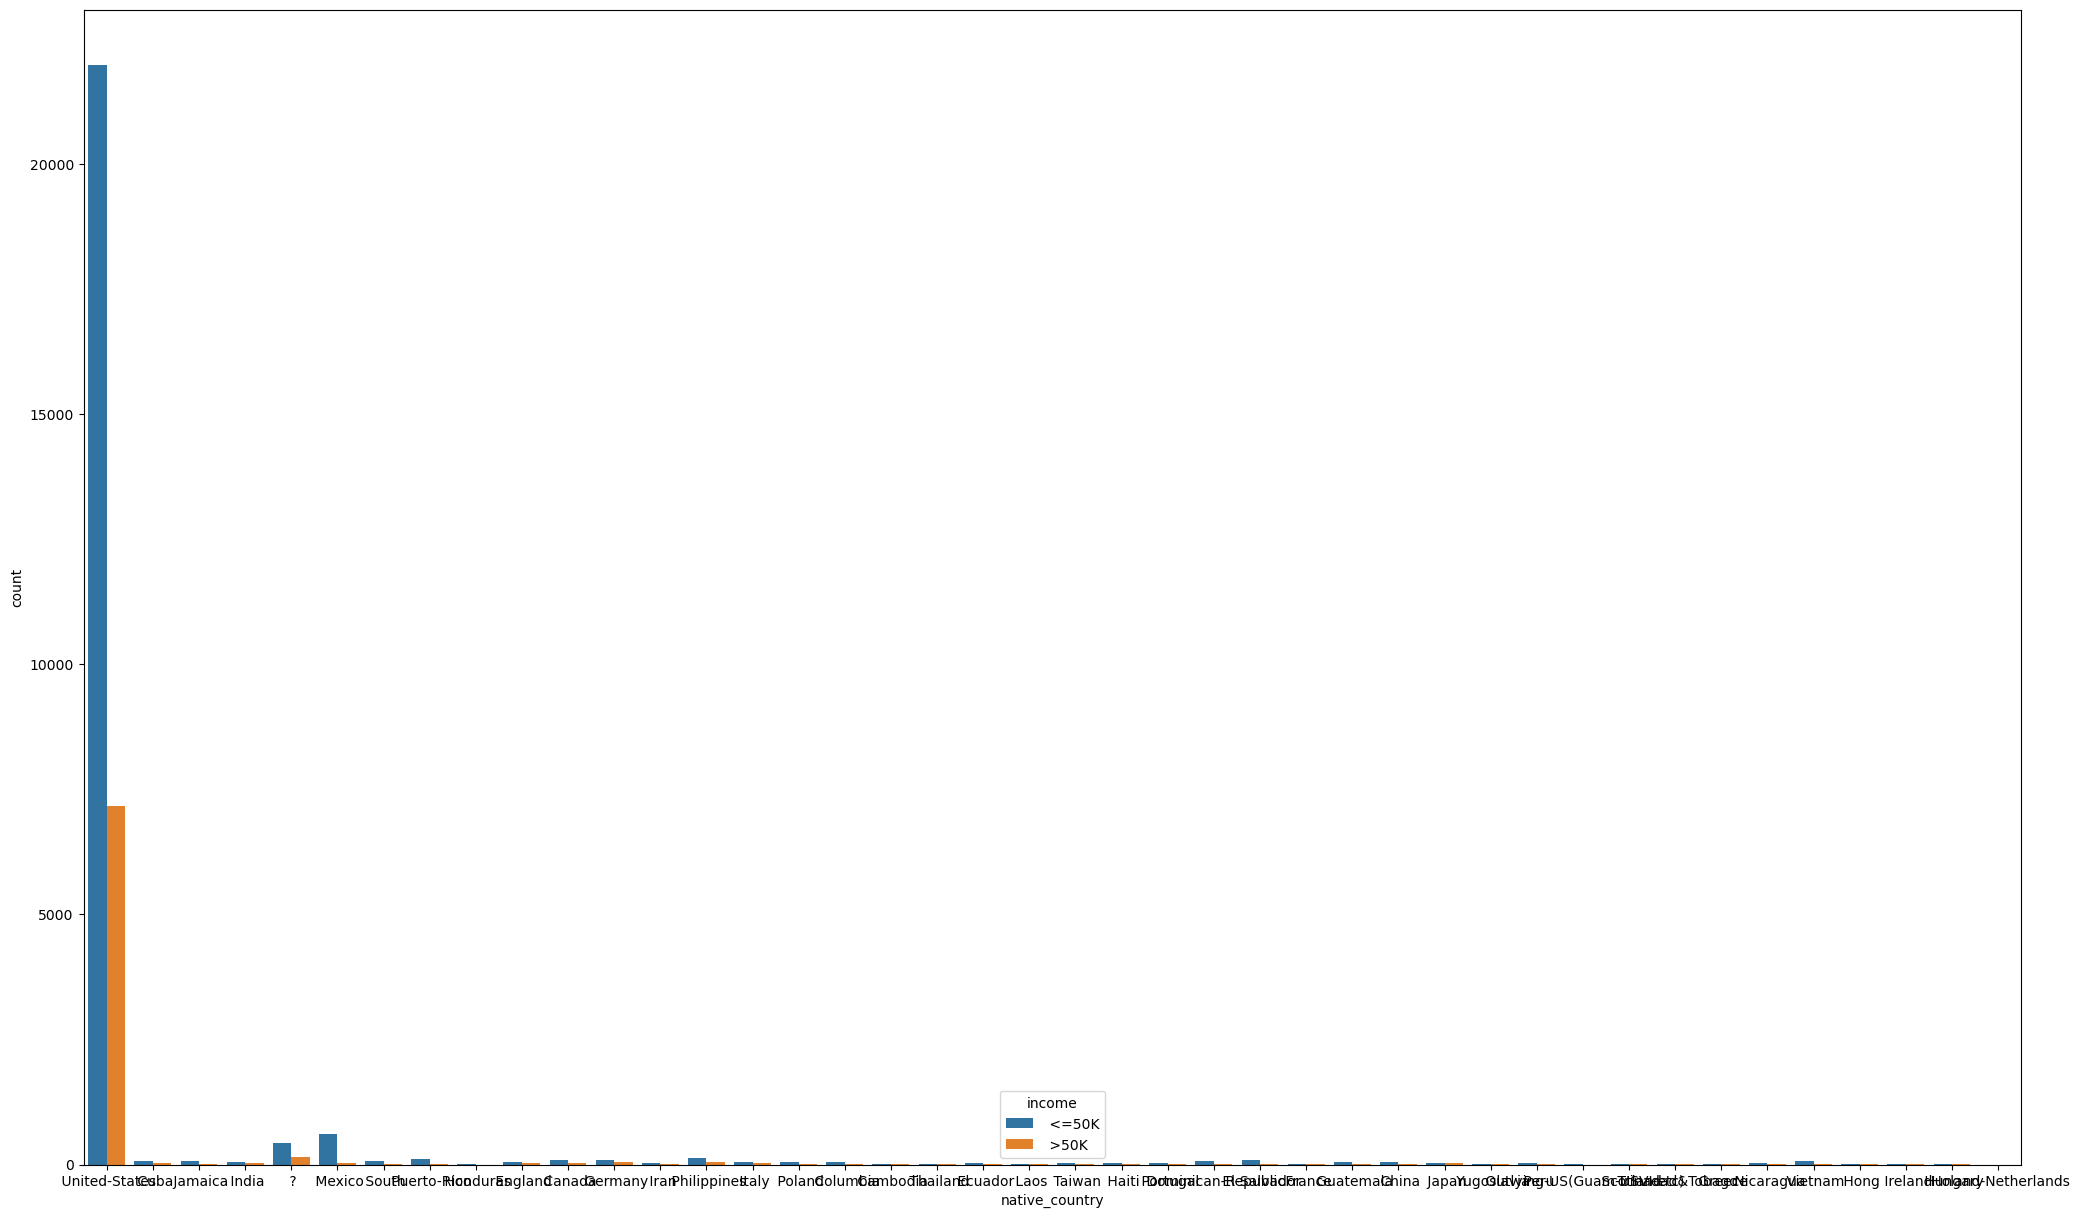

In [55]:
plt.figure(figsize=(25,15))
sns.countplot(data=df,x="native_country",hue="income")

<AxesSubplot:>

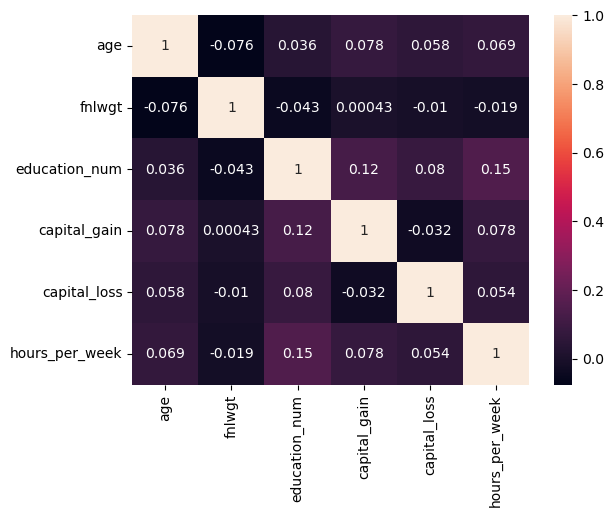

In [56]:
# correlation with the help of heatmap
sns.heatmap(df[numerical_columns].corr(),annot=True)

### Observation- We can observe that there is no correlation between the numerical features so none feature will be dropped

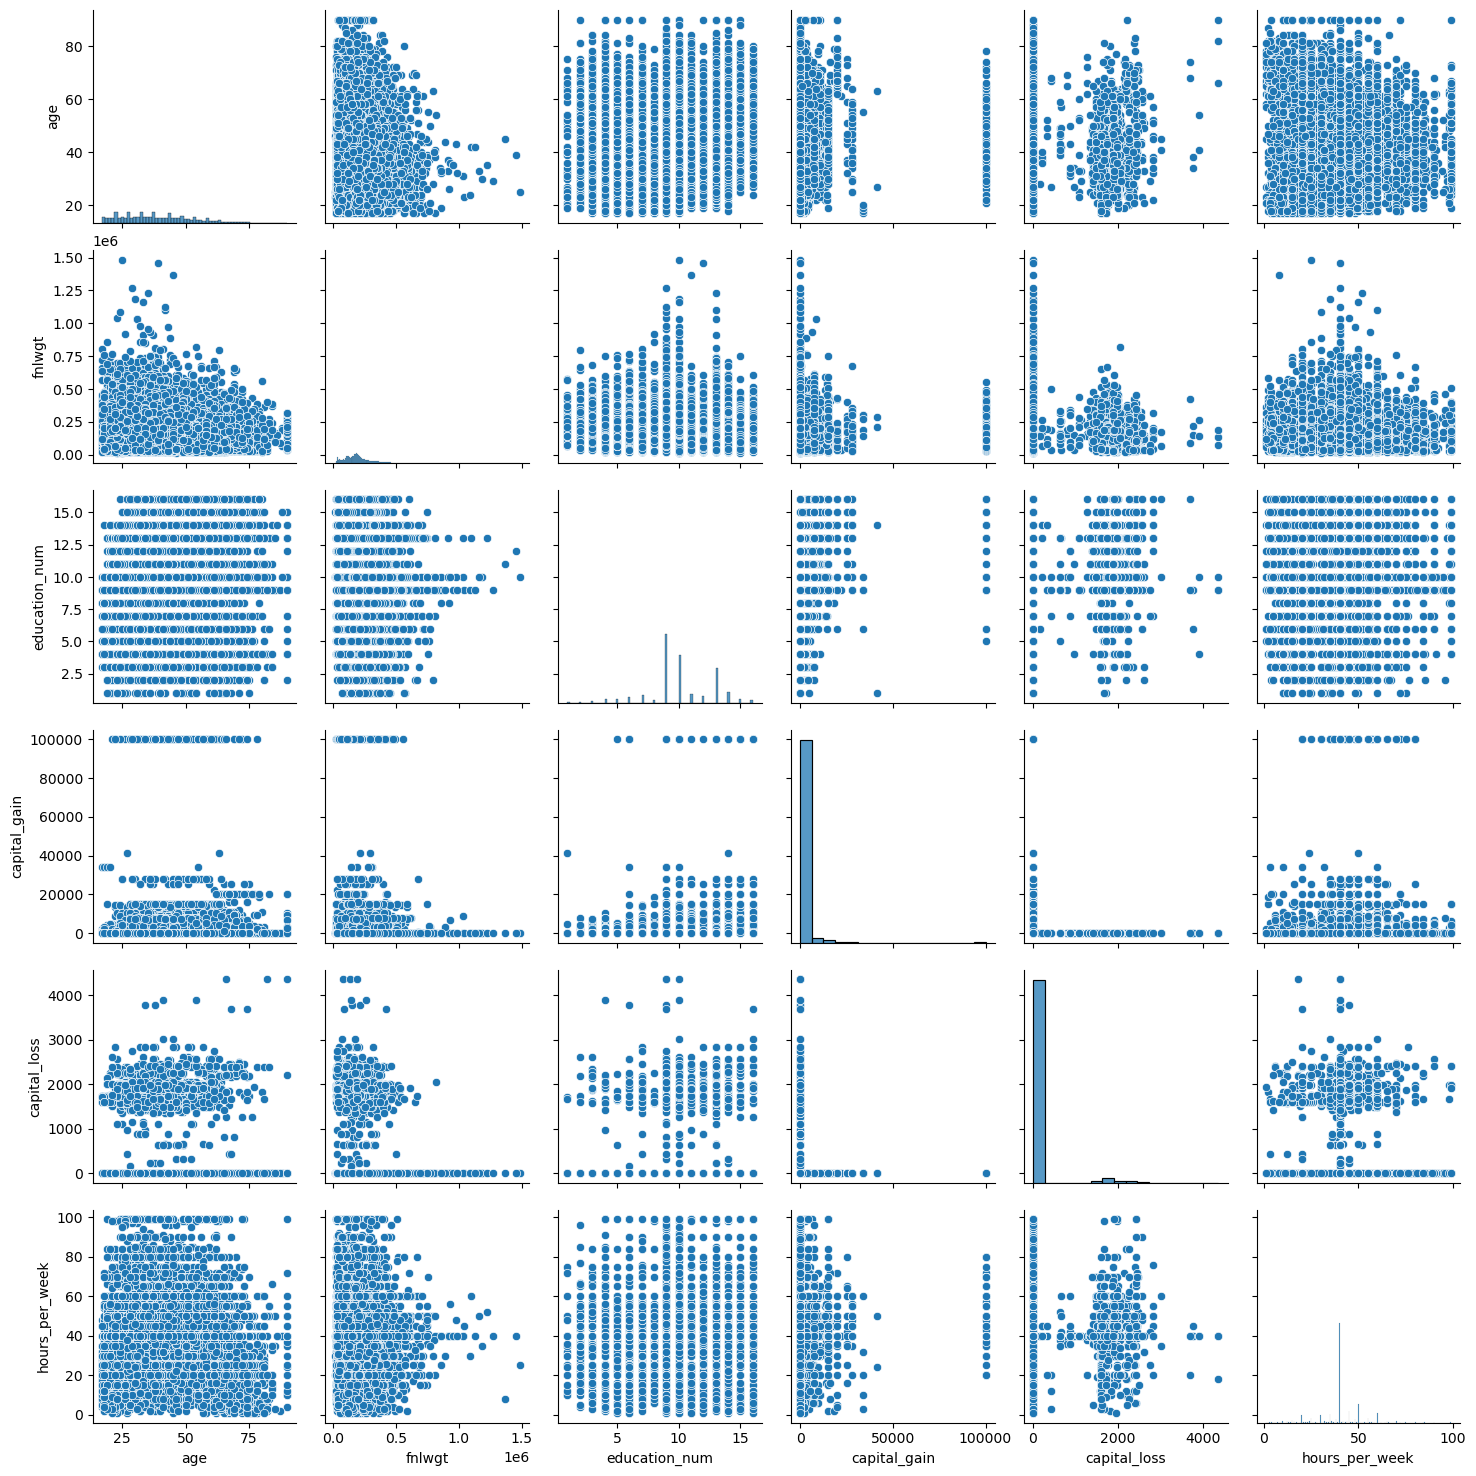

In [57]:
sns.pairplot(data=df)

# segregating target and independent columns

In [32]:

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [33]:
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [34]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

# Feature Engineering

In [58]:
#Define which feature is to be oridinal encoded and which has to be scaleed
categorical_cols=X.select_dtypes(include='object').columns
numerical_cols=X.select_dtypes(exclude='object').columns

In [59]:
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [60]:
numerical_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [68]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [80]:
#define custom ranking for each ordinal variables
workclass_categories=[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',' Local-gov', ' ?',
                      ' Self-emp-inc', ' Without-pay',' Never-worked']
education_categories=[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',' Some-college', ' Assoc-acdm', 
                      ' Assoc-voc', ' 7th-8th',' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',' Preschool', ' 12th']
marital_categories=[' Never-married', ' Married-civ-spouse', ' Divorced',' Married-spouse-absent', 
                    ' Separated', ' Married-AF-spouse',' Widowed']
occupation_categories=[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',' Prof-specialty', 
                       ' Other-service', ' Sales', ' Craft-repair',' Transport-moving', ' Farming-fishing', 
                       ' Machine-op-inspct',' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',' Priv-house-serv']
relationship_categories=[' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',' Other-relative']
race_categories=[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',' Other']
sex_categories=[' Male', ' Female']
native_categories=[' United-States', ' Cuba', ' Jamaica', ' India', ' ?', 
                   ' Mexico',' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
                   ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',' Columbia', 
                   ' Cambodia', ' Thailand', ' Ecuador', ' Laos',' Taiwan', ' Haiti', ' Portugal', 
                   ' Dominican-Republic',' El-Salvador', ' France', ' Guatemala', ' China', ' Japan', 
                   ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
                   ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland', 
                   ' Hungary', ' Holand-Netherlands']

In [81]:
# To handle missing values , we will use SimpleImputer
from sklearn.impute import SimpleImputer

In [82]:
# for feature scaling , we will use StandardScalar
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [84]:
#Numerical pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),

    ]
)

#Categorical pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[workclass_categories,education_categories,marital_categories,occupation_categories,relationship_categories,race_categories,sex_categories,native_categories])),
    ('scalar',StandardScaler())
    ]
)
preprocessor=ColumnTransformer([

    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])

In [94]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [95]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train))
X_test=pd.DataFrame(preprocessor.transform(X_test))

In [90]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.693443,0.503319,-0.033365,0.917418,-0.219029,-0.033058,-1.067560,0.462924,-0.068182,0.392825,-0.385795,4.38077,-0.705943,-0.258126
1,-0.555208,0.481795,1.135080,-0.142880,-0.219029,-0.033058,-0.253958,-0.991175,-0.862070,0.097597,-1.078844,-0.35442,-0.705943,-0.258126
2,0.840343,-1.391011,2.303525,1.929169,-0.219029,0.777388,-0.253958,1.626203,-0.068182,-0.492859,-0.385795,-0.35442,-0.705943,-0.258126
3,-1.216259,-0.006054,-0.422846,-0.142880,-0.219029,0.372165,-0.253958,-0.700355,-0.068182,0.097597,-0.385795,-0.35442,-0.705943,-0.258126
4,-0.775558,-0.787768,-0.422846,-0.142880,-0.219029,0.372165,-0.253958,-0.700355,-0.862070,-1.083316,-1.078844,-0.35442,1.416545,-0.258126


In [96]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.555208,-1.490113,0.356117,-0.14288,-0.219029,-0.033058,-1.881163,1.044564,-0.068182,0.392825,-0.385795,-0.354420,-0.705943,-0.258126
1,-1.069359,-0.568609,1.135080,-0.14288,-0.219029,-0.033058,0.559644,-0.991175,-0.862070,-1.083316,-1.078844,-0.354420,-0.705943,-0.258126
2,1.574844,-0.873647,-0.033365,-0.14288,-0.219029,1.587834,1.373246,0.462924,-0.068182,-0.197631,-0.385795,2.802373,-0.705943,2.297971
3,-0.555208,1.975786,-0.033365,-0.14288,-0.219029,-0.033058,-0.253958,0.462924,-0.862070,-1.083316,-1.078844,-0.354420,-0.705943,-0.258126
4,0.326192,-0.433605,1.135080,-0.14288,-0.219029,-0.033058,0.559644,-0.991175,-0.862070,-1.083316,-1.078844,-0.354420,-0.705943,-0.258126


## We have converted all the categorical columns into the numerical columns using the ordinal encoder and thus doing standard scaling

# Model Training

In [99]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
logistic=LogisticRegression()


In [100]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [101]:
y_pred=logistic.predict(X_test)

In [102]:
accuracy_score(y_test,y_pred) #test accuracy

0.8274943659086252

### HyperParameter Tuning

In [111]:
parameters={'C':[0.5,1,2,5,10,30,45,50],'penalty':['l2']}
regression_log=GridSearchCV(logistic,parameters,scoring='accuracy',cv=5)

In [112]:
regression_log.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 5, 10, 30, 45, 50],
                         'penalty': ['l2']},
             scoring='accuracy')

In [113]:
print(regression_log.best_params_)

{'C': 10, 'penalty': 'l2'}


In [114]:
print(regression_log.best_score_)

0.8255982436882547


In [116]:
logistic.score(X_train,y_train) #checking training accuracy

0.8253347969264544

In [117]:
# metrics evaluation
from sklearn.metrics import f1_score,roc_auc_score,precision_score,recall_score,confusion_matrix,classification_report

In [119]:
f1_score(y_test,y_pred,average=None)

array([0.89262943, 0.56145833])

In [126]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n       <=50K       0.85      0.95      0.89      7405\n        >50K       0.73      0.46      0.56      2357\n\n    accuracy                           0.83      9762\n   macro avg       0.79      0.70      0.73      9762\nweighted avg       0.82      0.83      0.81      9762\n'

In [127]:
confusion_matrix(y_test,y_pred)

array([[7000,  405],
       [1279, 1078]], dtype=int64)

##### Using the notation from the confusion matrix, we can say that:

##### There are 7000 samples that belong to class 0 and were correctly predicted as class 0 (true negatives).
##### There are 405 samples that belong to class 1 but were incorrectly predicted as class 0 (false negatives).
##### There are 1279 samples that belong to class 0 but were incorrectly predicted as class 1 (false positives).
##### There are 1078 samples that belong to class 1 and were correctly predicted as class 1 (true positives).